In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Introduction

First we'll load some dependencies into our Jupyter lab instance and print out the last date this notebook was run.

In [1]:
import datetime
import rdflib
start = datetime.datetime.utcnow()
print(f"Started at {start}")
from fastai.tabular import *
import sys
sys.path.append("../src")
import data_loader
import data_block

Started at 2020-06-25 21:41:58.249679


## Load RDF from Sinopia 
Download the zip exports from Sinopia's [Production](https://sinopia.io/exports), [Stage](https://stage.sinopia.io/exports), and [Development](https://development.sinopia.io/exports) environments.

We then call `data_loader.from_zipfile` function that returns a list of RDF graphs, one for each resource. For non-RDF fields, an error message is generated. 

In [10]:
help(data_loader.from_zipfile)

Help on function from_zipfile in module data_loader:

from_zipfile(zip_filepath: str) -> List
    Takes a zip filepath, extracts Sinopia RDF files, loading each JSON-LD
    into a rdflib.ConjunctionGraph, returns a list of these graphs.
    
    @param zip_filepath -- Path to zip files



In [2]:
production = data_loader.from_zipfile("../../sinopia_export_all_2020-06-14T00:01:59.604Z.zip")
stage = data_loader.from_zipfile("../../sinopia_export_all_2020-06-21T00:02:01.995Z.zip")
development = data_loader.from_zipfile("../../sinopia_export_dev-2020-06-21.zip")

Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/cornell_2020-06-14T00:01:59.650Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/minnesota_2020-06-14T00:02:22.353Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/ucdavis_2020-06-14T00:02:01.349Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/washington_2020-06-14T00:02:04.593Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/penn_2020-06-14T00:02:24.048Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/duke_2020-06-14T00:02:21.999Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/stanford_2020-06-14T00:02:02.754Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/alberta_2020-06-14T00:02:01.670Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:01:59.604Z/yale_2020-06-14T00:02:24.126Z/complete.log
Failed to parse sinopia_export_all_2020-06-14T00:

In [11]:
print(f"Length of production: {len(production)}, stage: {len(stage)}, and development {len(development)}")

Length of production: 2545, stage: 4067, and development 192


## First Stratgy Potential RDF Predicates as Data Frame Columns
The first strategy for creating a [Pandas Data Frame]() is defined in the `data_loader.to_dataframe` function that takes a list of RDF graphs and a Trellis URL of the environment's resource templates and returns a data frame.

In [12]:
help(data_loader.to_dataframe)

Help on function to_dataframe in module data_loader:

to_dataframe(graphs: List[rdflib.graph.Graph], rt_url: str) -> pandas.core.frame.DataFrame



How we create a data frame has siginificant implications for any machine learning classification tasks. Initially we will create three seperate data frames, one for each environment, starting with production.

In [14]:
prod_df = data_loader.to_dataframe(production, 'https://trellis.sinopia.io/repository/ld4p')

Starting convert 2545 to dataframe at 2020-06-25 22:28:01.519987
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500....Finished at 2020-06-25 22:30:46.731269 total time 2.75 minutes for dataframe, size 2547


In [18]:
print(f"The size of data frame: {len(prod_df)}")

The size of data frame: 2547


In [16]:
prod_df.head()

,subject,resource_template,group,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://www.stanford.edu,http://www.nytimes.com,http://rdaregistry.info/Elements/m/P30156,http://rdaregistry.info/Elements/m/P30139,http://uw.edu/ResourceWithAdaptationProperties,http://bibframe.org/ontologies/agent,...,http://www.loc.gov/mads/rdf/v1#FamilyName,http://id.loc.gov/ontologies/bibframe/Meeting,https://library.yale.edu/ld4p/terms/publisherLabel,https://library.yale.edu/ld4p/terms/publicationDateLabel,http://www.loc.gov/mads/rdf/v1#PersonalName,http://performedmusicontology.org/ontology/hasEnsembleCount,http://rdaregistry.info/Elements/m/P30155,http://rdaregistry.info/Elements/m/P30069,http://id.loc.gov/ontologies/bibframe/historyOfWork,http://id.loc.gov/ontologies/bibframe/ColorContent
0,https://trellis.sinopia.io/repository/cornell/...,CornellSinatra45:Work,cornell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.sinopia.io/repository/cornell/...,CornellSinatra45:Work,cornell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.sinopia.io/repository/cornell/...,CornellSinatra45:Instance,cornell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.sinopia.io/repository/cornell/...,CornellSinatra45:Work,cornell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.sinopia.io/repository/cornell/...,CornellSinatra45:Instance,cornell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
prod_df.tail()

,subject,resource_template,group,http://www.w3.org/1999/02/22-rdf-syntax-ns#value,http://www.stanford.edu,http://www.nytimes.com,http://rdaregistry.info/Elements/m/P30156,http://rdaregistry.info/Elements/m/P30139,http://uw.edu/ResourceWithAdaptationProperties,http://bibframe.org/ontologies/agent,...,http://www.loc.gov/mads/rdf/v1#FamilyName,http://id.loc.gov/ontologies/bibframe/Meeting,https://library.yale.edu/ld4p/terms/publisherLabel,https://library.yale.edu/ld4p/terms/publicationDateLabel,http://www.loc.gov/mads/rdf/v1#PersonalName,http://performedmusicontology.org/ontology/hasEnsembleCount,http://rdaregistry.info/Elements/m/P30155,http://rdaregistry.info/Elements/m/P30069,http://id.loc.gov/ontologies/bibframe/historyOfWork,http://id.loc.gov/ontologies/bibframe/ColorContent
2542,https://trellis.sinopia.io/repository/northwes...,ld4p:RT:bf2:Monograph:Work,northwestern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2543,https://trellis.sinopia.io/repository/northwes...,ld4p:RT:bf2:Monograph:Work,northwestern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2544,https://trellis.sinopia.io/repository/northwes...,ld4p:RT:bf2:Monograph:Work,northwestern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2545,https://trellis.sinopia.io/repository/northwes...,ld4p:RT:bf2:Monograph:Work,northwestern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2546,https://trellis.sinopia.io/repository/northwes...,ld4p:RT:bf2:Monograph:Work,northwestern,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
stage_df = data_loader.to_dataframe(stage, 'https://trellis.stage.sinopia.io/repository/ld4p')

Starting convert 4067 to dataframe at 2020-06-25 22:43:45.557133
Failed https://trellis.stage.sinopia.io/repository/ld4p/UNAM:RT:BF2:RetenciÃ³n status 404
.0..........100..........200..........300..........400..........500..........600..........700..........800..........900..........1000..........1100..........1200..........1300..........1400..........1500..........1600..........1700..........1800..........1900..........2000..........2100..........2200..........2300..........2400..........2500..........2600..........2700..........2800..........2900..........3000..........3100..........3200..........3300..........3400..........3500..........3600..........3700..........3800..........3900..........4000......Finished at 2020-06-25 22:48:26.569672 total time 4.683333333333334 minutes for dataframe, size 5497


In [29]:
%debug

> /home/jpnelson/.linuxbrew/opt/python/lib/python3.7/json/decoder.py(355)raw_decode()
    352         try:
    353             obj, end = self.scan_once(s, idx)
    354         except StopIteration as err:
--> 355             raise JSONDecodeError("Expecting value", s, err.value) from None
    356         return obj, end



ipdb>  s


In [41]:
stage_df.head()

,subject,resource_template,http://id.loc.gov/ontologies/bibframe/heldBy,http://id.loc.gov/ontologies/bibframe/note,http://www.w3.org/ns/prov#wasGeneratedBy,http://id.loc.gov/ontologies/bibframe/usageAndAccessPolicy,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://sinopia.io/vocabulary/hasResourceTemplate,http://id.loc.gov/ontologies/bibframe/electronicLocator,http://id.loc.gov/ontologies/bibframe/itemOf,...,http://id.loc.gov/ontologies/bflc/profile,http://id.loc.gov/ontologies/bibframe/dissertation,http://id.loc.gov/ontologies/bflc/relation,http://id.loc.gov/ontologies/bibframe/itemPortion,http://id.loc.gov/ontologies/bibframe/ColorContent,http://rdaregistry.info/Elements/w/P10223,http://rdaregistry.info/Elements/w/P10256,http://rdaregistry.info/Elements/e/P20001,http://rdaregistry.info/Elements/e/P20310,http://id.loc.gov/ontologies/bibframe/acquisitionSource
0,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested,1.0,2.0,1.0,1.0,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://trellis.stage.sinopia.io/repository/uc...,ld4p:RT:bf2:Serial:Work:Un-nested,0.0,0.0,3.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested,1.0,1.0,1.0,1.0,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Work:Un-nested,0.0,0.0,4.0,0.0,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://trellis.stage.sinopia.io/repository/uc...,UCSD:RT:BF2:Monograph:Item_OpenAccess_UnNested,1.0,1.0,1.0,1.0,1,1,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
len(prod_df.keys())

1061

In [43]:
len(stage_df.keys())

186

In [11]:
prod_data = data_block.databunch(prod_df)

/home/jpnelson/ai-env/lib/python3.7/site-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
UCSD:RT:BF2:NotatedMusicOnline:Instance_OpenAccess:Un-nested, sinopia:resourceTemplate:bf2:Agents:Addresses:Extended, sinopia:resourceTemplate:bf2:Agents:RelatedAgents, UChicago:RT:bf2:Monograph:Item, UCSD:RT:BF2:NotatedMusic:Work:Un-nested...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [21]:
prod_data

TabularDataBunch;

Train: LabelList (2038 items)
x: TabularList
subject https://trellis.sinopia.io/repository/cornell/d0f34e5b-c17a-4384-ae5d-84f432a5842d; http://id.loc.gov/ontologies/bibframe/adminMetadata 0.0000; http://rdaregistry.info/Elements/w/P10331 0.0000; http://rdaregistry.info/Elements/w/P10332 0.0000; http://rdaregistry.info/Elements/w/P10223 0.0000; http://rdaregistry.info/Elements/w/P10086 0.0000; http://rdaregistry.info/Elements/w/P10256 0.0000; http://rdaregistry.info/Elements/w/P10004 0.0000; http://rdaregistry.info/Elements/w/P10061 0.0000; https://doi.org/10.6069/uwlib.55.d.4#hasCreatorCharacteristic 0.0000; http://rdaregistry.info/Elements/w/P10219 0.0000; http://rdaregistry.info/Elements/w/P10218 0.0000; http://rdaregistry.info/Elements/w/P10058 0.0000; http://rdaregistry.info/Elements/w/P10055 0.0000; http://rdaregistry.info/Elements/w/P10068 0.0000; http://rdaregistry.info/Elements/w/P10147 0.0000; http://rdaregistry.info/Elements/w/P10002 0.0000; http://www.loc

In [50]:
stage_data = data_block.databunch(stage_df)

/Users/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai-1.0.61.dev0-py3.8.egg/fastai/data_block.py:540: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
sinopia:resourceTemplate:bf2:Item:Enumeration, WAU:RT:MADSRDF:COMPLEXSUBJECT, sinopia:resourceTemplate:bf2:Item:Retention, harvard:test3:RT:bf2:Monograph:Item:ItemForward, ld4p:RT:bf2:NotatedMusic:Instance...
  if getattr(ds, 'warn', False): warn(ds.warn)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


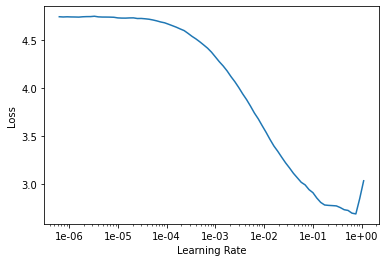

In [19]:
prod_learner = tabular_learner(prod_data, layers=[300,100], metrics=accuracy)
prod_learner.lr_find()
prod_learner.recorder.plot()

In [20]:
prod_learner.fit(9, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,1.267249,1.600114,0.406250,00:01
1,0.801857,1.386650,0.552083,00:01
2,0.489366,1.738786,0.416667,00:01
3,0.302642,1.426645,0.538194,00:01
4,0.184520,1.284397,0.545139,00:01
5,0.106254,1.988799,0.468750,00:01
6,0.063475,1.879764,0.520833,00:01
7,0.036779,1.835612,0.548611,00:01
8,0.022108,1.533070,0.565972,00:01


In [18]:
prod_learner.predict()

TypeError: predict() missing 1 required positional argument: 'item'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


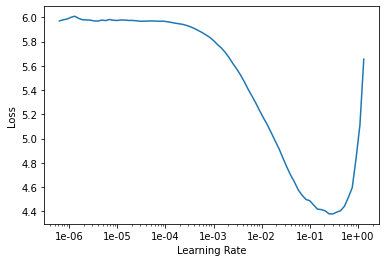

In [58]:
stage_learner = tabular_learner(stage_data, layers=[200,100], metrics=accuracy)
stage_learner.lr_find()
stage_learner.recorder.plot()

In [66]:
stage_learner.fit(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.897901,2.237767,0.431755,00:37
1,0.784005,2.356385,0.423398,00:36


In [67]:
stage_345 = stage_df.iloc[345]

In [68]:
stage_345

subject                                                                              b2
resource_template                                          ld4p:RT:bf2:MIBluRayDVD:Item
http://id.loc.gov/ontologies/bibframe/heldBy                                          0
http://id.loc.gov/ontologies/bibframe/note                                            0
http://www.w3.org/ns/prov#wasGeneratedBy                                              0
                                                                       ...             
http://rdaregistry.info/Elements/w/P10223                                             0
http://rdaregistry.info/Elements/w/P10256                                             0
http://rdaregistry.info/Elements/e/P20001                                             0
http://rdaregistry.info/Elements/e/P20310                                             0
http://id.loc.gov/ontologies/bibframe/acquisitionSource                               0
Name: 345, Length: 186, dtype: o

In [71]:
len(prod_learner.data.classes)

75

In [72]:
len(stage_learner.data.classes)

300

In [73]:
len(prod_df.keys())

311

In [74]:
len(stage_df.keys())

186

In [75]:
prod_learner.data.classes

['CornellSinatra45:Instance',
 'CornellSinatra45:Work',
 'PMO:RT:bf2:SoundRecording:Instance',
 'PMO:RT:bf2:SoundRecording:Work',
 'UAL:resourceTemplate:bf2:Monograph:Instance',
 'UAL:resourceTemplate:bf2:Monograph:Instance:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Item:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Opus',
 'UAL:resourceTemplate:bf2:Monograph:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Monograph:Work',
 'UAL:resourceTemplate:bf2:Monograph:Work:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Instance',
 'UAL:resourceTemplate:bf2:Serial:Item',
 'UAL:resourceTemplate:bf2:Serial:Opus:Un-Nested',
 'UAL:resourceTemplate:bf2:Serial:Work',
 'UChicago:RT:bf2:Monograph:Instance',
 'UChicago:RT:bf2:Monograph:Item',
 'UChicago:RT:bf2:Monograph:Work',
 'UMN:RT:BF2:AdminMetadata',
 'UMN:RT:bf2:Monograph:Instance:Un-nested',
 'UMN:RT:bf2:Monograph:Item:Un-nested',
 'WAU:RT:BF2:BFLC:AdminMetadata',
 'WAU:RT:RDA:Expression:dvdVideo',
 'WAU:RT:RDA:Expression:monograph',
 'WAU:RT:

In [87]:
len(prod_data.classes)

75

In [88]:
len(stage_data.classes)

300

## Second Strategy - Actual RDF Predicates as Data Frame Columns

## Third Strategy - RDF Triples with Subject-Predicate-Object rows

In [ ]:
def graph_triples_df(graph: rdflib.Graph) -> pd.DataFrame:
    data = [(str(s), str(p), str(o)) for s,p,o in graph.skolemize(authority=f"https://{graph.identifier}.sinopia.io//")]
    result = graph.query(SUBJ_RT)
    if len(result.bindings) < 1:
        return # Doesn't try to return anything
    resource_template = str(graph.query(SUBJ_RT).bindings[0]['resource_template'])
    df = pd.DataFrame(data=data, columns=['Subject', 'Predicate', 'Object'])
    df['resource_template'] = resource_template
    return df